A. Understanding and Processing the Data

In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# File path
file_path = r"C:\Users\morri\Desktop\MSBA\MIS382N ADVANCED MACHINE LEARNING\Final Project\diabetes_dataset(Sheet1).csv"
# Load the dataset
df = pd.read_csv(file_path).drop(columns=["Unnamed: 0"])
# Display the table
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,targets
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


In [3]:
### Chi-Square Test###
categorical_vars = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", 
                    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", 
                    "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk", 
                    "Sex", "Education", "Income", "targets"] 

chi_square_matrix = pd.DataFrame(np.ones((len(categorical_vars), len(categorical_vars))), 
                                 index=categorical_vars, 
                                 columns=categorical_vars, dtype=float)

# Perform Chi-Square test
for i, var1 in enumerate(categorical_vars):
    for j, var2 in enumerate(categorical_vars):
        if i < j:  # Only compute for the upper triangle
            contingency_table = pd.crosstab(df[var1].dropna(), df[var2].dropna())
            if contingency_table.size > 0:  # Ensure non-empty table
                chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
                chi_square_matrix.loc[var1, var2] = p_value
                chi_square_matrix.loc[var2, var1] = np.nan  # Set lower triangle to NaN

mask = np.tril(np.ones(chi_square_matrix.shape), k=-1)

# Display the matrix
print("Chi-Square Test")
chi_square_matrix

Chi-Square Test


,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,Education,Income,targets
HighBP,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.069134e-92,5.170865e-209,4.641061e-02,2.291157e-83,2.427700e-18,0.000000e+00,2.439584e-152,0.000000e+00,0.000000e+00,0.000000e+00
HighChol,NaN,1.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.580058e-94,1.152369e-89,6.442038e-09,2.638219e-100,2.132523e-11,0.000000e+00,1.231405e-55,1.006966e-273,0.000000e+00,0.000000e+00
CholCheck,NaN,NaN,1.0,6.028491e-07,6.414307e-34,1.204345e-109,3.590798e-02,3.498617e-33,2.143738e-03,8.325611e-33,0.000000e+00,5.394139e-189,9.557480e-93,9.161258e-29,4.004818e-08,1.947093e-13,3.751399e-233
Smoker,NaN,NaN,NaN,1.000000e+00,2.580241e-208,0.000000e+00,0.000000e+00,0.000000e+00,7.998984e-54,0.000000e+00,1.253830e-31,4.145476e-134,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.640172e-206
Stroke,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,1.320590e-265,1.658322e-11,3.461289e-95,1.659214e-17,1.098488e-05,1.169815e-68,0.000000e+00,1.362430e-01,0.000000e+00,0.000000e+00,0.000000e+00
HeartDiseaseorAttack,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,2.265085e-23,1.492289e-86,3.408353e-48,4.509564e-21,7.135621e-55,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
PhysActivity,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,4.619575e-10,1.954842e-71,1.716027e-211,0.000000e+00,3.988755e-60,0.000000e+00,0.000000e+00,0.000000e+00
Fruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,1.335935e-70,8.991095e-57,6.295589e-110,6.145086e-131,0.000000e+00,0.000000e+00,0.000000e+00,1.088121e-93
Veggies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,3.029428e-26,3.907693e-50,3.363101e-59,0.000000e+00,2.519257e-233,0.000000e+00,0.000000e+00,1.463029e-178
HvyAlcoholConsump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.420947e-07,1.910655e-02,3.604803e-80,3.945665e-03,5.630483e-36,2.691429e-165,1.865932e-181


In [4]:
### ANOVA Test###
continuous_vars = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age"]

print("\n===== ANOVA Test for Continuous vs Categorical Variables =====")
for var in continuous_vars:
    group0 = df[df["targets"] == 0][var]  # Class 0 (Non-Diabetic)
    group1 = df[df["targets"] == 1][var]  # Class 1 (Diabetic)
    
    f_stat, p_value = stats.f_oneway(group0, group1)
    
    print(f"\nANOVA Test for '{var}' vs 'targets':")
    print(f"F-Statistic: {f_stat}, P-value: {p_value}")
    
    # Interpretation
    if p_value < 0.05:
        print(f"→ Significant difference in '{var}' between groups")
    else:
        print(f"→ No significant difference in '{var}' between groups")

#Correlation Matrix for Continuous Variables#
print("\n===== Correlation Matrix for Continuous Variables =====")
corr_matrix = df[continuous_vars].corr()

# Display the matrix
corr_matrix


===== ANOVA Test for Continuous vs Categorical Variables =====

ANOVA Test for 'BMI' vs 'targets':
F-Statistic: 12516.718641971956, P-value: 0.0
→ Significant difference in 'BMI' between groups

ANOVA Test for 'GenHlth' vs 'targets':
F-Statistic: 23924.564884541673, P-value: 0.0
→ Significant difference in 'GenHlth' between groups

ANOVA Test for 'MentHlth' vs 'targets':
F-Statistic: 1224.7005908347467, P-value: 1.14328334104769e-267
→ Significant difference in 'MentHlth' between groups

ANOVA Test for 'PhysHlth' vs 'targets':
F-Statistic: 7672.267689883243, P-value: 0.0
→ Significant difference in 'PhysHlth' between groups

ANOVA Test for 'Age' vs 'targets':
F-Statistic: 8246.866284054873, P-value: 0.0
→ Significant difference in 'Age' between groups

===== Correlation Matrix for Continuous Variables =====


,BMI,GenHlth,MentHlth,PhysHlth,Age
BMI,1.000000,0.239185,0.085310,0.121141,-0.036618
GenHlth,0.239185,1.000000,0.301674,0.524364,0.152450
MentHlth,0.085310,0.301674,1.000000,0.353619,-0.092068
PhysHlth,0.121141,0.524364,0.353619,1.000000,0.099130
Age,-0.036618,0.152450,-0.092068,0.099130,1.000000


In [5]:
# Based on the results from the ANOVA test (for continuous variables) and the Chi-Square test (for categorical variables), all p-values are extremely 
# small (less than 0.05). This indicates that every feature in the dataset has a statistically significant relationship with the target variable. Since 
# all features are highly correlated with the target, there is no need to remove any variables from the analysis.

B. Splitting Data

In [7]:
# 80% training and 20% testing split
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=["targets"]) # Independent variables
y = df["targets"]  # Target variable

# Perform an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((202944, 21), (50736, 21), (202944,), (50736,))

In [8]:
# 70% training, 15% validation, and 15% testing split for cross validation
# First, split into 70% training and 30% temporary set (validation + test)
cv_X_train, cv_X_temp, cv_y_train, cv_y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Then split the 30% temporary set into 15% validation and 15% testing
cv_X_val, cv_X_test, cv_y_val, cv_y_test = train_test_split(cv_X_temp, cv_y_temp, test_size=0.5, random_state=42, stratify=cv_y_temp)

# Display the shapes of the resulting datasets
cv_X_train.shape, cv_X_val.shape, cv_X_test.shape, cv_y_train.shape, cv_y_val.shape, cv_y_test.shape


((177576, 21), (38052, 21), (38052, 21), (177576,), (38052,), (38052,))

C. Classification Models Training 

In [10]:
#random forrest (nothing added)

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(cv_X_train, cv_y_train)

# Evaluate on validation set
val_preds = rf_model.predict(cv_X_val)
print("Validation Set Results:")
print("Accuracy:", accuracy_score(cv_y_val, val_preds))
print("Confusion Matrix:\n", confusion_matrix(cv_y_val, val_preds))
print("Classification Report:\n", classification_report(cv_y_val, val_preds))

# Final evaluation on test set
test_preds = rf_model.predict(cv_X_test)
print("Test Set Results:")
print("Accuracy:", accuracy_score(cv_y_test, test_preds))
print("Confusion Matrix:\n", confusion_matrix(cv_y_test, test_preds))
print("Classification Report:\n", classification_report(cv_y_test, test_preds))

Validation Set Results:
Accuracy: 0.8598233995584988
Confusion Matrix:
 [[31797   953]
 [ 4381   921]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     32750
           1       0.49      0.17      0.26      5302

    accuracy                           0.86     38052
   macro avg       0.69      0.57      0.59     38052
weighted avg       0.82      0.86      0.83     38052

Test Set Results:
Accuracy: 0.8594817617996426
Confusion Matrix:
 [[31772   978]
 [ 4369   933]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     32750
           1       0.49      0.18      0.26      5302

    accuracy                           0.86     38052
   macro avg       0.68      0.57      0.59     38052
weighted avg       0.82      0.86      0.83     38052



In [12]:
# added class_weight (focus on the minority class)

In [13]:
# Initialize Random Forest with class weighting
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(cv_X_train, cv_y_train)

# Validation performance
val_preds = rf_model.predict(cv_X_val)
print("Validation Set Results:")
print("Accuracy:", accuracy_score(cv_y_val, val_preds))
print("Confusion Matrix:\n", confusion_matrix(cv_y_val, val_preds))
print("Classification Report:\n", classification_report(cv_y_val, val_preds))

# Test performance
test_preds = rf_model.predict(cv_X_test)
print("Test Set Results:")
print("Accuracy:", accuracy_score(cv_y_test, test_preds))
print("Confusion Matrix:\n", confusion_matrix(cv_y_test, test_preds))
print("Classification Report:\n", classification_report(cv_y_test, test_preds))

Validation Set Results:
Accuracy: 0.8576684536949437
Confusion Matrix:
 [[31819   931]
 [ 4485   817]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     32750
           1       0.47      0.15      0.23      5302

    accuracy                           0.86     38052
   macro avg       0.67      0.56      0.58     38052
weighted avg       0.82      0.86      0.83     38052

Test Set Results:
Accuracy: 0.858246609902239
Confusion Matrix:
 [[31821   929]
 [ 4465   837]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     32750
           1       0.47      0.16      0.24      5302

    accuracy                           0.86     38052
   macro avg       0.68      0.56      0.58     38052
weighted avg       0.82      0.86      0.83     38052



In [14]:
#added Importance Features

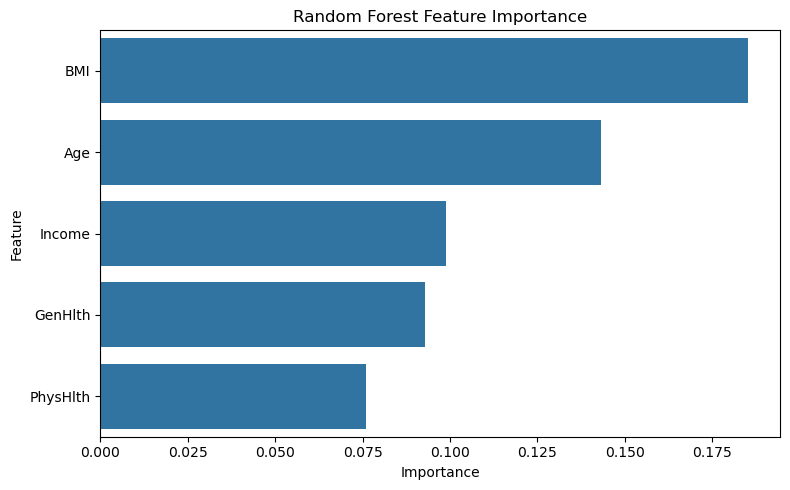

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
feat_imp_df

top_features = feat_imp_df.head(5)
plt.figure(figsize=(8, 5))
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [16]:
# File path
file_path = r"C:\Users\morri\Desktop\MSBA\MIS382N ADVANCED MACHINE LEARNING\Final Project\diabetes_dataset(Sheet1).csv"
# Load the dataset
df = pd.read_csv(file_path).drop(columns=["Unnamed: 0"])
# Drop low-importance features
columns_to_drop = [
    'CholCheck'
]
df = df.drop(columns=columns_to_drop)
print(df.columns.tolist())

['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'targets']


In [17]:
# Separate features and target
X = df.drop('targets', axis=1)
y = df["targets"]

# Train/val/test split: 70/15/15
cv_X_train, cv_X_temp, cv_y_train, cv_y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
cv_X_val, cv_X_test, cv_y_val, cv_y_test = train_test_split(
    cv_X_temp, cv_y_temp, test_size=0.5, random_state=42, stratify=cv_y_temp
)

# Train Random Forest with class weighting
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(cv_X_train, cv_y_train)

# Validation performance
val_preds = rf_model.predict(cv_X_val)
print("Validation Set Results:")
print("Accuracy:", accuracy_score(cv_y_val, val_preds))
print("Confusion Matrix:\n", confusion_matrix(cv_y_val, val_preds))
print("Classification Report:\n", classification_report(cv_y_val, val_preds))

# Test performance
test_preds = rf_model.predict(cv_X_test)
print("Test Set Results:")
print("Accuracy:", accuracy_score(cv_y_test, test_preds))
print("Confusion Matrix:\n", confusion_matrix(cv_y_test, test_preds))
print("Classification Report:\n", classification_report(cv_y_test, test_preds))

Validation Set Results:
Accuracy: 0.8587459266267213
Confusion Matrix:
 [[31775   975]
 [ 4400   902]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     32750
           1       0.48      0.17      0.25      5302

    accuracy                           0.86     38052
   macro avg       0.68      0.57      0.59     38052
weighted avg       0.82      0.86      0.83     38052

Test Set Results:
Accuracy: 0.8595343214548512
Confusion Matrix:
 [[31770   980]
 [ 4365   937]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     32750
           1       0.49      0.18      0.26      5302

    accuracy                           0.86     38052
   macro avg       0.68      0.57      0.59     38052
weighted avg       0.82      0.86      0.83     38052



In [18]:
# added SMOTE, lower accuracey but better if your goal is to catch more diabetic patients

In [19]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to training set ONLY
smote = SMOTE(random_state=42)
cv_X_train_resampled, cv_y_train_resampled = smote.fit_resample(cv_X_train, cv_y_train)

# Train Random Forest on resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(cv_X_train_resampled, cv_y_train_resampled)

# Validation performance
val_preds = rf_model.predict(cv_X_val)
print("Validation Set Results:")
print("Accuracy:", accuracy_score(cv_y_val, val_preds))
print("Confusion Matrix:\n", confusion_matrix(cv_y_val, val_preds))
print("Classification Report:\n", classification_report(cv_y_val, val_preds))

# Test performance
test_preds = rf_model.predict(cv_X_test)
print("Test Set Results:")
print("Accuracy:", accuracy_score(cv_y_test, test_preds))
print("Confusion Matrix:\n", confusion_matrix(cv_y_test, test_preds))
print("Classification Report:\n", classification_report(cv_y_test, test_preds))

Validation Set Results:
Accuracy: 0.7877378324398192
Confusion Matrix:
 [[27504  5246]
 [ 2831  2471]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87     32750
           1       0.32      0.47      0.38      5302

    accuracy                           0.79     38052
   macro avg       0.61      0.65      0.63     38052
weighted avg       0.82      0.79      0.80     38052

Test Set Results:
Accuracy: 0.7863187217491854
Confusion Matrix:
 [[27459  5291]
 [ 2840  2462]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87     32750
           1       0.32      0.46      0.38      5302

    accuracy                           0.79     38052
   macro avg       0.61      0.65      0.62     38052
weighted avg       0.82      0.79      0.80     38052



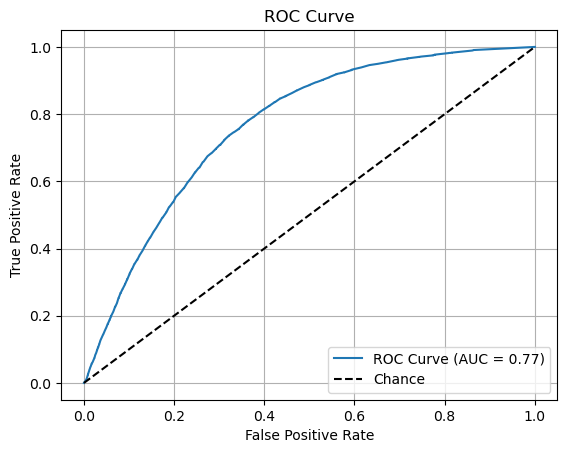

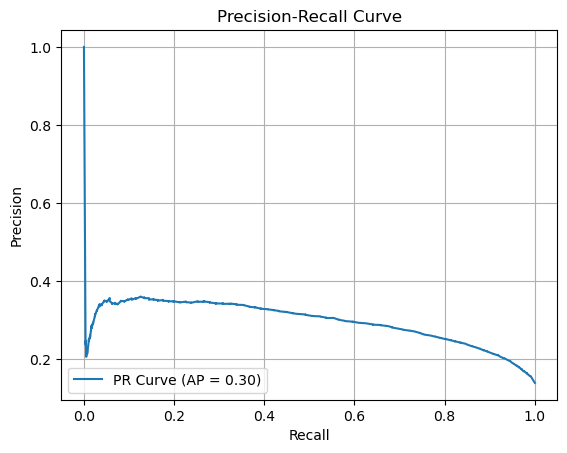

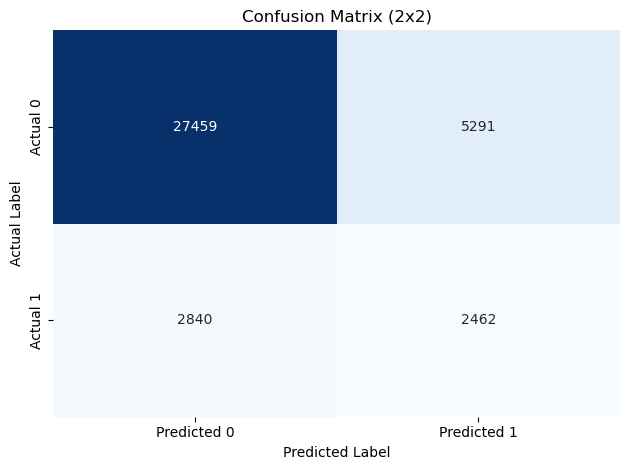

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    confusion_matrix
)

# Get predicted probabilities for the positive class
y_scores = rf_model.predict_proba(cv_X_test)[:, 1]

# ----- ROC Curve -----
fpr, tpr, _ = roc_curve(cv_y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# ----- PR Curve -----
precision, recall, _ = precision_recall_curve(cv_y_test, y_scores)
avg_precision = average_precision_score(cv_y_test, y_scores)

plt.figure()
plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# ----- Confusion Matrix Heatmap ----- (need to be fixed)
cm = confusion_matrix(cv_y_test, test_preds)
cm_df = pd.DataFrame(
    cm,
    index=['Actual 0', 'Actual 1'],
    columns=['Predicted 0', 'Predicted 1']
)

ax = sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix (2x2)')
plt.tight_layout()
plt.show()

